In [1]:
from pycaret.classification import *


In [2]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [3]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [4]:
target = dataset[['ICU_mortality']]

target.head()

,ICU_mortality
0,0
1,0
2,0
3,0
4,0


In [5]:

dataset = dataset[['age','BMI','APACHEII','trauma','metabolic','gastrointestinal','Sepsis','EN_pro_day0/kg','EN_pro_day1/kg','EN_pro_day2/kg','EN_pro_day3/kg','EN_pro_day4/kg','EN_pro_day5/kg']]
print(dataset.shape)

(976, 13)


In [6]:
dataset.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,72,23.875115,16,0,1,0,1,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,58,32.979592,23,0,1,0,1,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,44,22.857143,0,0,0,1,1,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,71,19.227688,0,0,1,1,0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,60,32.791945,17,1,1,1,0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


# under_sampling

In [7]:
from imblearn.under_sampling import EditedNearestNeighbours
  
#Edited Nearest Neighbours: This algorithm removes any sample which has labels different from those of its adjoining classes.
#pramaters to use:(ratio='auto', return_indices=False, random_state=None, size_ngh=None, n_neighbors=3, kind_sel='all', n_jobs=1)
en = EditedNearestNeighbours()
dataset, target = en.fit_resample(dataset, target)

In [8]:
dataset.shape

(589, 13)

In [9]:

downsampled = pd.concat([dataset, target],axis=1)

# checking counts
downsampled.ICU_mortality.value_counts()

0    354
1    235
Name: ICU_mortality, dtype: int64

In [10]:
downsampled.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg,ICU_mortality
0,58,32.979592,23,0,1,0,1,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000,0
1,71,19.227688,0,0,1,1,0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667,0
2,57,34.717839,26,0,1,0,1,0.496533,0.275733,0.904000,0.811733,0.432533,0.000000,0
3,63,23.374726,16,0,0,0,1,0.785400,1.383591,1.582979,1.065138,1.327454,1.395000,0
4,39,18.730489,0,1,1,0,1,0.515885,0.922515,0.000000,0.000000,0.000000,0.000000,0


In [11]:

data = downsampled.sample(frac=0.9, random_state=7)


In [12]:
data.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg,ICU_mortality
476,78,23.795360,0,1,1,1,1,1.375625,1.395000,1.395000,1.312594,0.903656,0.919406,1
360,64,34.602076,28,0,1,0,0,0.251093,0.422400,1.010185,0.321402,0.450427,0.729600,1
477,67,21.224490,0,1,1,0,0,0.003385,0.563569,0.561231,0.561231,0.561231,0.383508,1
316,83,27.681661,0,0,1,0,1,0.882550,1.116000,1.116000,0.244125,0.000000,0.000000,0
534,58,24.221453,0,1,0,1,1,0.000000,0.279478,1.076522,1.152000,1.152000,1.152000,1


# models exploration

In [13]:
from pycaret.classification import *
model_setup = setup(data=data, target='ICU_mortality', data_split_stratify = True)


,Description,Value
0,session_id,4789
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(530, 14)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7270,0.7805,0.5833,0.6817,0.6231,0.4125,0.4186,0.0100
rf,Random Forest Classifier,0.6811,0.7485,0.4667,0.6494,0.5269,0.2985,0.3164,0.0690
gbc,Gradient Boosting Classifier,0.6784,0.7304,0.4876,0.6233,0.5324,0.2977,0.3111,0.0330
et,Extra Trees Classifier,0.6595,0.6985,0.4610,0.6093,0.5120,0.2595,0.2728,0.0600
lightgbm,Light Gradient Boosting Machine,0.6405,0.6980,0.5090,0.5573,0.5268,0.2385,0.2425,0.0250
ada,Ada Boost Classifier,0.6324,0.6736,0.4995,0.5608,0.5101,0.2199,0.2298,0.0280
nb,Naive Bayes,0.6297,0.6831,0.5095,0.5328,0.5187,0.2187,0.2198,0.0060
dt,Decision Tree Classifier,0.6270,0.6023,0.4881,0.5324,0.5036,0.2068,0.2100,0.0060
qda,Quadratic Discriminant Analysis,0.6270,0.6530,0.5219,0.5295,0.5200,0.2155,0.2190,0.0160
lr,Logistic Regression,0.6162,0.6719,0.3867,0.5261,0.4434,0.1605,0.1660,0.3910


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


# RF

In [14]:
#for more info: https://pycaret.org/tune-model/
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5676,0.0000,0.0000,0.0000,0.0000,-0.0534,-0.1376
1,0.4054,0.0000,1.0000,0.4054,0.5769,0.0000,0.0000
2,0.4054,0.0000,1.0000,0.4054,0.5769,0.0000,0.0000
3,0.4054,0.0000,1.0000,0.4054,0.5769,0.0000,0.0000
4,0.4054,0.0000,1.0000,0.4054,0.5769,0.0000,0.0000
5,0.4054,0.0000,1.0000,0.4054,0.5769,0.0000,0.0000
6,0.6216,0.0000,0.0667,1.0000,0.1250,0.0783,0.2018
7,0.4054,0.0000,1.0000,0.3889,0.5600,0.0333,0.1300
8,0.4595,0.0000,1.0000,0.4118,0.5833,0.1019,0.2318
9,0.6216,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


# ROC

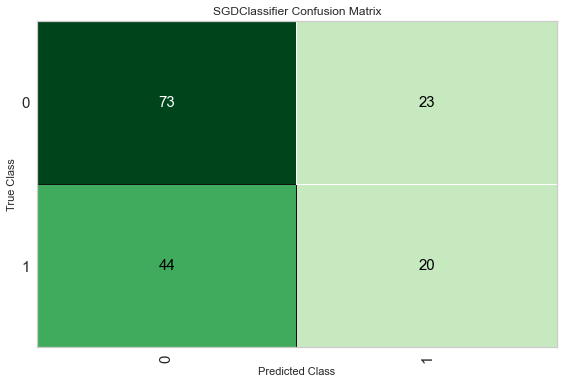

In [16]:
plot_model(tuned_rf, plot = 'confusion_matrix')

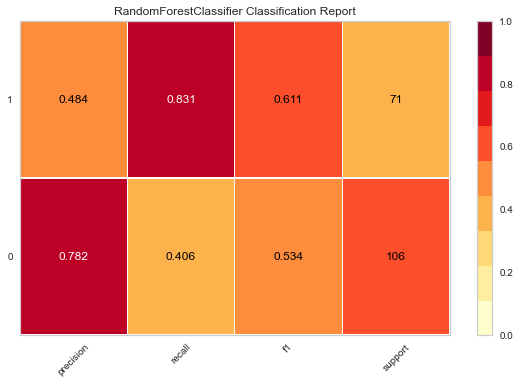

In [17]:
plot_model(tuned_rf, plot = 'class_report')

In [52]:
final_rf = finalize_model(tuned_rf)

predictions =  predict_model(final_rf, data = data_unseen)


saved_rf = save_model(final_rf, 'final-model-rf')

Transformation Pipeline and Model Succesfully Saved


# KNN

In [17]:
#for more info: https://pycaret.org/tune-model/
model = create_model("knn")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6757,0.7773,0.5333,0.6154,0.5714,0.3127,0.3148
1,0.6486,0.7106,0.3333,0.6250,0.4348,0.2128,0.2349
2,0.7297,0.8455,0.5333,0.7273,0.6154,0.4146,0.4264
3,0.8378,0.8788,0.6667,0.9091,0.7692,0.6487,0.6673
4,0.8378,0.9364,0.7333,0.8462,0.7857,0.6563,0.6607
5,0.8378,0.9061,0.8000,0.8000,0.8000,0.6636,0.6636
6,0.6216,0.7121,0.6000,0.5294,0.5625,0.2315,0.2329
7,0.7297,0.7298,0.4286,0.7500,0.5455,0.3729,0.4025
8,0.7297,0.8090,0.5714,0.6667,0.6154,0.4089,0.4118
9,0.8378,0.8416,0.7857,0.7857,0.7857,0.6553,0.6553


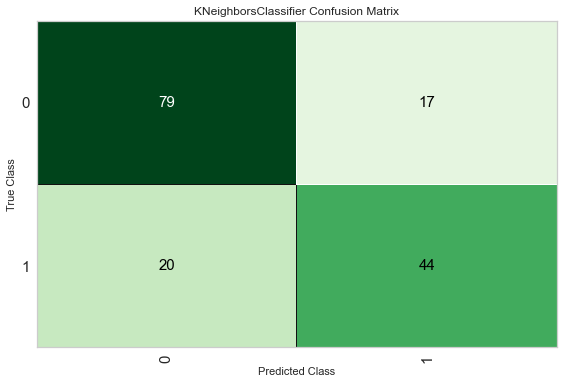

In [18]:
plot_model(tuned_rf, plot = 'confusion_matrix')

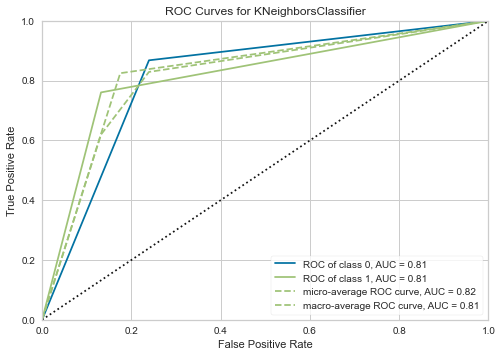

In [20]:
plot_model(tuned_rf, plot = 'auc')

In [19]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = [1,10,20]
p=[1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10,scoring="recall")
#Fit the model
best_model = clf.fit(data.iloc[:,:13], data.iloc[:,13])
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 2
Best n_neighbors: 1


In [20]:
print( best_model.best_score_)


0.7441558441558442


In [23]:
test = downsampled.sample(frac=0.1, random_state=20)


In [24]:
y_pred = best_model.best_estimator_.predict(test.iloc[:,:13])
from sklearn.metrics import confusion_matrix
print (confusion_matrix(test.iloc[:,13], y_pred))

[[43  0]
 [ 1 15]]
